In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
from tensorflow.keras.regularizers import l2

In [15]:
from tensorflow.keras.backend import clear_session
clear_session()

In [4]:
!pip install pydot

In [2]:
model = Sequential()
model.add(Conv2D(64,kernel_size= (3,3),activation='relu' , strides= 1,input_shape=(48,48,1),padding='same'))
model.add(Conv2D(64,kernel_size= (3,3), activation='relu', strides=1))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size= (3,3),activation='relu' , strides= 1, padding= 'same'))
model.add(Conv2D(128,kernel_size= (3,3), activation='relu', strides=1))



model.add(Conv2D(256,kernel_size= (3,3),activation='relu' , strides= 1))
model.add(Conv2D(256,kernel_size= (3,3), activation='relu', strides=2))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation='relu', kernel_regularizer= l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(7, activation= 'softmax'))

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='ProposedCNNmodel.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [109]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 19, 19, 256)     

In [110]:
train_datagen= ImageDataGenerator(rescale= 1./255)
val_datagen= ImageDataGenerator(rescale=1./255)

In [111]:
train_generator= train_datagen.flow_from_directory(
    'emotion_dataset_Not_augmented/train',
    target_size= (48,48),
    batch_size= 64,
    color_mode='grayscale'
    ,class_mode= 'categorical'
)
val_generator= val_datagen.flow_from_directory(
    'emotion_dataset_Not_augmented/test'
    ,target_size =(48,48)
    ,batch_size= 64,
    color_mode= 'grayscale'
    ,class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [21]:
from collections import Counter

class_counts = Counter(train_generator.classes)


class_labels = train_generator.class_indices 
index_to_class = {v: k for k, v in class_labels.items()}

print('Training Data Class Count:\n')
for class_index, count in class_counts.items():
    print(f"{index_to_class[class_index]}: {count} images")

print('\n')
class_counts = Counter(val_generator.classes)


class_labels = val_generator.class_indices 
index_to_class = {v: k for k, v in class_labels.items()}

print('Validation Data Class Counts:\n')
for class_index, count in class_counts.items():
    print(f"{index_to_class[class_index]}: {count} images")

Training Data Class Count:

angry: 3995 images
disgusted: 436 images
fearful: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprised: 3171 images


Validation Data Class Counts:

angry: 958 images
disgusted: 111 images
fearful: 1024 images
happy: 1774 images
neutral: 1233 images
sad: 1247 images
surprised: 831 images


In [112]:

optimizer = keras.optimizers.Adam(learning_rate=0.0001)


In [113]:
model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

In [114]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', 
                               patience=4,  
                               restore_best_weights=True)

In [115]:
history = model.fit(
    train_generator, 
    validation_data= val_generator,
    epochs =15, 
    shuffle = True,

    
)

Epoch 1/15
449/449 [==============================] - 21s 45ms/step - loss: 2.5541 - accuracy: 0.2475 - val_loss: 2.0980 - val_accuracy: 0.2657
Epoch 2/15
449/449 [==============================] - 25s 55ms/step - loss: 1.8645 - accuracy: 0.3707 - val_loss: 1.6832 - val_accuracy: 0.4269
Epoch 3/15
449/449 [==============================] - 24s 54ms/step - loss: 1.6277 - accuracy: 0.4346 - val_loss: 1.5518 - val_accuracy: 0.4565
Epoch 4/15
449/449 [==============================] - 23s 52ms/step - loss: 1.5012 - accuracy: 0.4714 - val_loss: 1.4347 - val_accuracy: 0.4957
Epoch 5/15
449/449 [==============================] - 23s 52ms/step - loss: 1.4060 - accuracy: 0.5004 - val_loss: 1.3538 - val_accuracy: 0.5180
Epoch 6/15
449/449 [==============================] - 24s 52ms/step - loss: 1.3364 - accuracy: 0.5267 - val_loss: 1.3249 - val_accuracy: 0.5267
Epoch 7/15
449/449 [==============================] - 74s 165ms/step - loss: 1.2829 - accuracy: 0.5434 - val_loss: 1.2819 - val_accuracy

Text(0.5, 1.0, 'validation_loss vs training_loss with 40epochs')

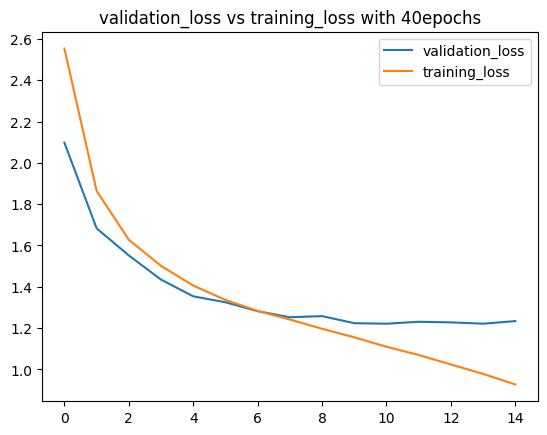

In [117]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label= 'validation_loss')
plt.plot(history.history['loss'], label = 'training_loss')
plt.legend()
plt.title('validation_loss vs training_loss with 40epochs')

Text(0.5, 1.0, 'validation_accuracy vs training_accuracy with 40epochs')

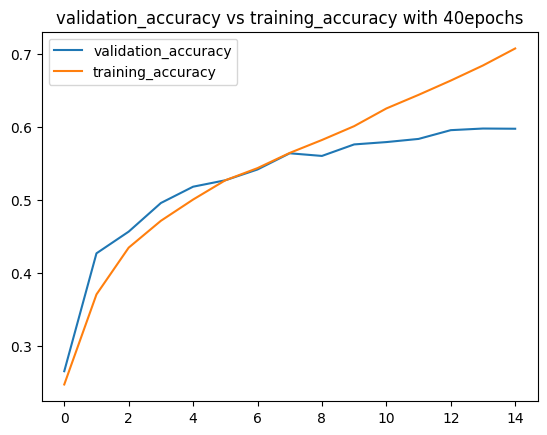

In [118]:
plt.plot(history.history['val_accuracy'], label= 'validation_accuracy')
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.title('validation_accuracy vs training_accuracy with 40epochs')